In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, PolynomialFeatures

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_df = pd.read_csv("Resources/tracks.csv")
data_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
data_df['release_date'] = pd.to_datetime(data_df['release_date'])
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [6]:
data_df['poprange'] = KBinsDiscretizer(encode='ordinal', strategy = 'uniform').fit_transform(data_df['popularity'].values.reshape(-1,1))
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,poprange
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.0


In [7]:
data_df['poprange'].count()

586672

In [8]:
data_df['poprange'].value_counts()

1.0    219152
0.0    209890
2.0    129786
3.0     26890
4.0       954
Name: poprange, dtype: int64

In [9]:
data_df.dtypes

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
poprange                   float64
dtype: object

In [10]:
data_df.drop(['popularity'],axis =1)

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,poprange
0,35iwgR4jXetI318WEWsa1Q,Carve,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.0


In [11]:
strat_data_df = data_df.groupby('poprange', group_keys=False).apply(lambda x: x.sample(frac=0.2))
strat_data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,poprange
503343,6d91D7nypScSNhCE8YMuvU,Weana G’schichterln,8,184413,0,"['Walter Heider', 'Leopold Heider', 'Lothar St...","['6olZP51re1iNpGOYnwNdCo', '7syaiwV5X5KGgFxYXm...",1991-06-01,0.468,0.472,...,-9.461,1,0.0404,0.6210,0.000000,0.2320,0.6720,92.827,4,0.0
305901,0gyAxTTftjTp1ebHLdfY12,Bonustrack: Ain't She Sweet - 1988 Remaster,2,164973,0,['Leo Mathisen'],['4QwVIOQSO1QfLfmceOLJJI'],1962-01-01,0.596,0.270,...,-14.792,1,0.0417,0.9940,0.840000,0.1360,0.7480,98.258,4,0.0
514686,43uuGxWBkeN4pkaLjEaS6L,Bhalira,0,43040,0,['Madhavapeddi Sathyam'],['7xAzMg8rqBtiEDQfVhTLEB'],1951-12-31,0.427,0.412,...,-9.526,0,0.0862,0.9960,0.000027,0.2120,0.4860,73.737,4,0.0
440109,6O6PN8L0HPZj4Rg0wMf4Tc,Is Trua Nach Bhfuil Mé in Éirinn,14,257360,0,['The Bothy Band'],['37fTum13aTdEbeGGLMUhXz'],1975-01-01,0.487,0.184,...,-14.964,1,0.0300,0.7670,0.000304,0.1340,0.4580,71.954,3,0.0
21742,0A8QwYGyMFxYMNtHODZeVm,"Violin Sonata No. 3 in D Minor, Op. 108: 2. Ad...",0,273640,0,"['Johannes Brahms', 'Georg Kulenkampff', 'Sir ...","['5wTAi7QkpP6kp8a54lmTOq', '5L2B6s0OSVglL3Faqp...",1948-01-01,0.107,0.127,...,-24.976,1,0.0516,0.9790,0.930000,0.1040,0.0411,72.963,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64439,31AOj9sFz2gM0O3hMARRBx,Losing My Religion,83,268427,0,['R.E.M.'],['4KWTAlx2RvbpseOGMEmROg'],1991-03-12,0.666,0.855,...,-5.051,0,0.0295,0.1790,0.000001,0.0987,0.8030,125.639,4,4.0
93808,5YYW3yRktprLRr47WK219Y,Ella No Es Tuya - Remix,92,218107,0,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']","['4riOEaOW5hCeqomFDBk0aP', '7iK8PXO48WeuP03g8Y...",2021-02-03,0.585,0.611,...,-4.132,1,0.2880,0.3900,0.000000,0.6490,0.9620,97.041,4,4.0
93320,4crczEC1PpoD8TsDsmoWNI,Goodbye,80,144000,0,"['Imanbek', 'Goodboys']","['5rGrDvrLOV2VV8SCFVGWlj', '2nm38smINjms1LtczR...",2020-12-18,0.741,0.931,...,-3.447,0,0.0563,0.0225,0.000102,0.1910,0.5170,125.011,4,4.0
93139,39LLxExYz6ewLAcYrzQQyP,Levitating,82,203808,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2020-03-27,0.695,0.884,...,-2.278,0,0.0753,0.0561,0.000000,0.2130,0.9140,103.014,4,4.0


In [12]:
features = strat_data_df.drop(['popularity','poprange','id','name','artists','id_artists','release_date'],axis =1)
poly = PolynomialFeatures(include_bias = False)
poly_features = poly.fit_transform(features)
poly_features_df = pd.DataFrame(poly_features, columns = poly.get_feature_names_out(features.columns))
poly_features_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,liveness^2,liveness valence,liveness tempo,liveness time_signature,valence^2,valence tempo,valence time_signature,tempo^2,tempo time_signature,time_signature^2
0,184413.0,0.0,0.468,0.472,0.0,-9.461,1.0,0.0404,0.6210,0.000000,...,0.053824,0.155904,21.535864,0.9280,0.451584,62.379744,2.6880,8616.851929,371.308,16.0
1,164973.0,0.0,0.596,0.270,0.0,-14.792,1.0,0.0417,0.9940,0.840000,...,0.018496,0.101728,13.363088,0.5440,0.559504,73.496984,2.9920,9654.634564,393.032,16.0
2,43040.0,0.0,0.427,0.412,3.0,-9.526,0.0,0.0862,0.9960,0.000027,...,0.044944,0.103032,15.632244,0.8480,0.236196,35.836182,1.9440,5437.145169,294.948,16.0
3,257360.0,0.0,0.487,0.184,7.0,-14.964,1.0,0.0300,0.7670,0.000304,...,0.017956,0.061372,9.641836,0.4020,0.209764,32.954932,1.3740,5177.378116,215.862,9.0
4,273640.0,0.0,0.107,0.127,7.0,-24.976,1.0,0.0516,0.9790,0.930000,...,0.010816,0.004274,7.588152,0.3120,0.001689,2.998779,0.1233,5323.599369,218.889,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117329,268427.0,0.0,0.666,0.855,9.0,-5.051,0.0,0.0295,0.1790,0.000001,...,0.009742,0.079256,12.400569,0.3948,0.644809,100.888117,3.2120,15785.158321,502.556,16.0
117330,218107.0,0.0,0.585,0.611,6.0,-4.132,1.0,0.2880,0.3900,0.000000,...,0.421201,0.624338,62.979609,2.5960,0.925444,93.353442,3.8480,9416.955681,388.164,16.0
117331,144000.0,0.0,0.741,0.931,10.0,-3.447,0.0,0.0563,0.0225,0.000102,...,0.036481,0.098747,23.877101,0.7640,0.267289,64.630687,2.0680,15627.750121,500.044,16.0
117332,203808.0,0.0,0.695,0.884,6.0,-2.278,0.0,0.0753,0.0561,0.000000,...,0.045369,0.194682,21.941982,0.8520,0.835396,94.154796,3.6560,10611.884196,412.056,16.0


In [13]:
poly_features_df.count()

duration_ms               117334
explicit                  117334
danceability              117334
energy                    117334
key                       117334
                           ...  
valence tempo             117334
valence time_signature    117334
tempo^2                   117334
tempo time_signature      117334
time_signature^2          117334
Length: 119, dtype: int64

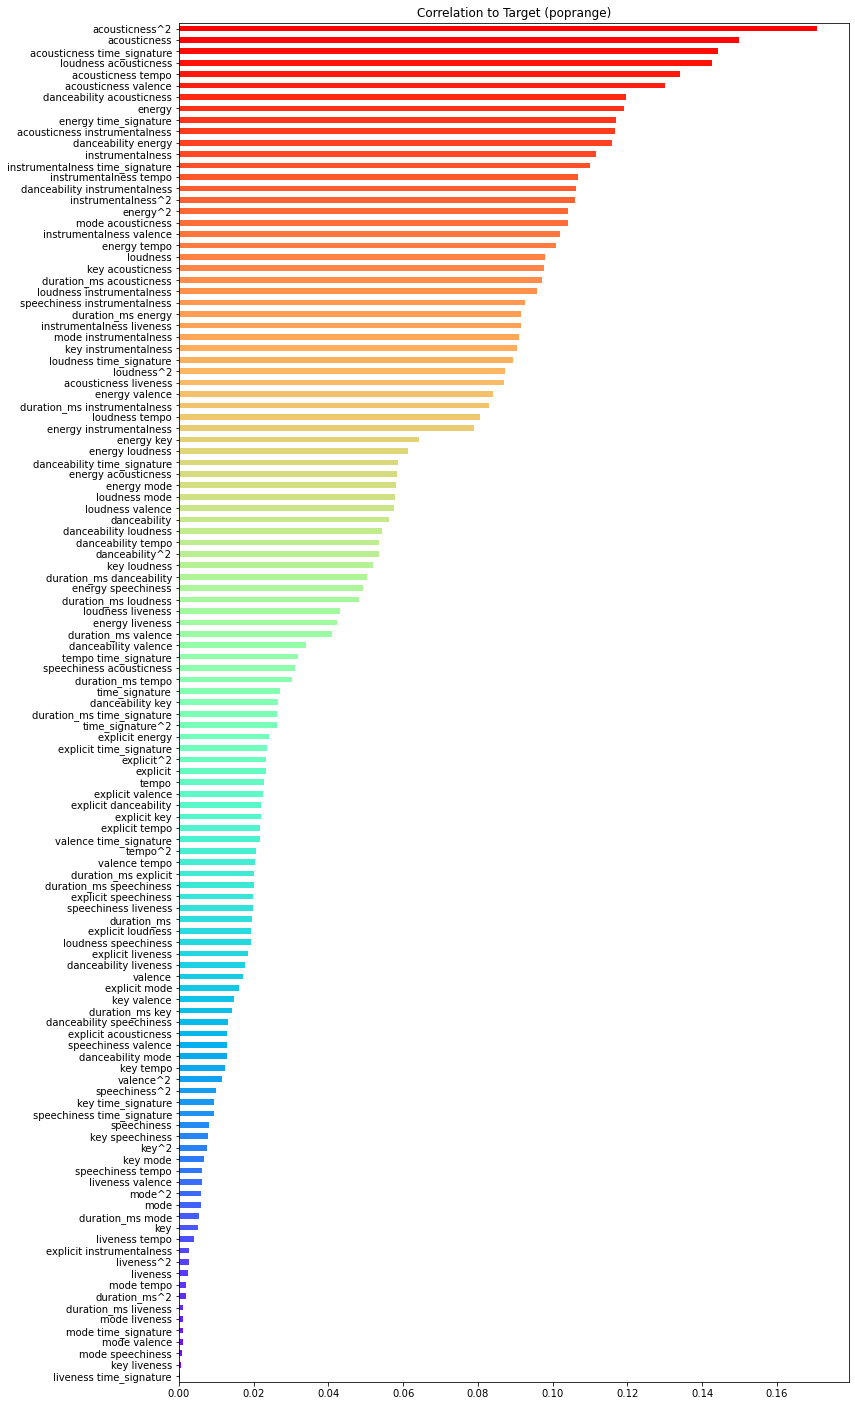



 liveness time_signature        0.000214
key liveness                   0.000416
mode speechiness               0.000899
mode valence                   0.001034
mode time_signature            0.001089
                                 ...   
acousticness tempo             0.134087
loudness acousticness          0.142704
acousticness time_signature    0.144315
acousticness                   0.149770
acousticness^2                 0.170633
Length: 119, dtype: float64


In [14]:
n_fts = len(poly_features_df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True).plot(kind='barh', 
                                                                                     color=colors, figsize=(12, 25))
plt.title('Correlation to Target (poprange)')
plt.show()

print('\n\n',poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True))

In [15]:
corr_df = poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True)
corr_df_filt = corr_df[corr_df > 0.1]

In [16]:
feature_names = corr_df_filt.index

multiclass classification sk learn
mlextend: sequential feature selection 

# Logistic Regression

In [18]:
y = strat_data_df["poprange"]
X = poly_features_df[feature_names]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1, stratify=y)

In [20]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='newton-cg', random_state=1, n_jobs = -1,verbose = 5)
classifier

In [ ]:
classifier.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

kfold cross validation verbose 5

svm random forest, SequentialFeatureSelector 

sv, rbf support vector machine

# Support Vector Machine

In [21]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf', verbose= True)
model.fit(X_train_scaled, y_train)

[LibSVM].............................................
*......
*..
*
optimization finished, #iter = 52019
obj = -45776.072554, rho = -0.725069
nSV = 46099, nBSV = 45968
..........................
*.....
*.
*
optimization finished, #iter = 31904
obj = -30437.074433, rho = -0.407477
nSV = 30794, nBSV = 30664
......
*...........
*.
*
optimization finished, #iter = 18461
obj = -8067.910276, rho = -0.996737
nSV = 8944, nBSV = 7653
*
optimization finished, #iter = 949
obj = -285.997879, rho = -1.004270
nSV = 519, nBSV = 228
........................
*..................
*
optimization finished, #iter = 42129
obj = -38935.771107, rho = -0.957420
nSV = 40079, nBSV = 37844
.....
*........
*...
*
optimization finished, #iter = 15179
obj = -8067.925163, rho = -0.991503
nSV = 9194, nBSV = 7535
*
optimization finished, #iter = 810
obj = -285.998474, rho = -1.005982
nSV = 510, nBSV = 238
....
*.......
*
optimization finished, #iter = 11272
obj = -8067.954337, rho = -0.997334
nSV = 8824, nBSV = 7622
*
o

SVC(verbose=5)

In [24]:
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.374


In [ ]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
predictions = rf_model.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Cross Validation K-folds

In [28]:
kf = KFold(n_splits=2, random_state=1, shuffle = True)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=2, random_state=1, shuffle=True)


In [29]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_scaled, X_test_scaled = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      2      3 ... 117331 117332 117333] TEST: [     1      4      6 ... 117323 117324 117329]


KeyError: "None of [Int64Index([     0,      2,      3,      5,      7,      9,     11,     13,\n                14,     15,\n            ...\n            117316, 117322, 117325, 117326, 117327, 117328, 117330, 117331,\n            117332, 117333],\n           dtype='int64', length=58667)] are in the [columns]"

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=66)
sfs.fit(X, y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=5),
                          n_features_to_select=3)

NameError: name 'KNeighborsClassifier' is not defined